#Линейная регрессия.

Сегодня мы с вами перейдем к новому для нас разделу - **машинному обучению**. В целом машинное обучение - это наука, изучающая способы извлечения закономерностей из ограниченного количества примеров. Машинное обучение имеет множество применений и неразрывно связано с такими областями как искуственный интеллект и анализ данных. Нам же с вами будет интересная связь машинного обучения с анализом данных и статистикой. 

Темой сегодняшнего семинара является **линейная регрессия**.

Сегодня на семинаре мы:

- познакомимся с определением одномерной и многомерной линейной регрессии
- поймем, как происходит оценка коэффициентов линейной регрессии
- научимся использовать библиотеку [Statsmodels](http://statsmodels.sourceforge.net/). для оценки коэффициентов
- поймем, как коэффициенты можно интерпретировать и как с их помощью строить прогнозы
- узнаем, как оценивать качество полученных прогнозов
- сделаем выводы из прогнозов
- поймем, что такое переобучение 
- и даже поговорим про обработку категориальных признаков!!!

## Линейная регрессия 

### Мотивация

Почему мы изучаем линеную регрессию?
- широко используема
- легко использовать (не нужно тюнить много параметров)
- относительно легко интерпретируема
- является базой для понимания более сложных алгоритмов
- встречается в независимом экзамене!!!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Мы рассмотрим Advertising Dataset

В нём хранится информация об объемах продаж продукта и деньгах, потраченных на рекламу этого продукта на ТВ, радио и в газетах.


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-python-mirec/dap_mirec_2022/main/seminar9/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


С точки зрения машинного обучения переменная *Sales* - будет являться **таргетом** (или зависимой переменной / целевой переменной), то есть тем, что мы хотим предсказать или на что хотим оценить влияние других переменных. А переменные *TV*, *Radio*, *Newspaper* будут являться **признаками** (регрессорами, фичами, факторами), то есть тем, с помощью чего мы можем описать нашу целевую переменную или посмотреть влияние признаков на неё.

В нашем случае есть следующие признаки:
- TV: доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- Radio: доллары, потраченные на радио рекламу
- Newspaper: доллары, потраченные на рекламу в газетах

И целевая переменная:
- Sales: продажи одного продукта на данном рынке (в тысячах)

In [ ]:
data.shape

(200, 4)

В нашей выборке мы имеем 200 **наблюдений / "семплов"** (200 рынков в наборе данных)

Можем посмотреть на взаимосвязь между признаками и целевой переменной используя диаграмму рассеяния.

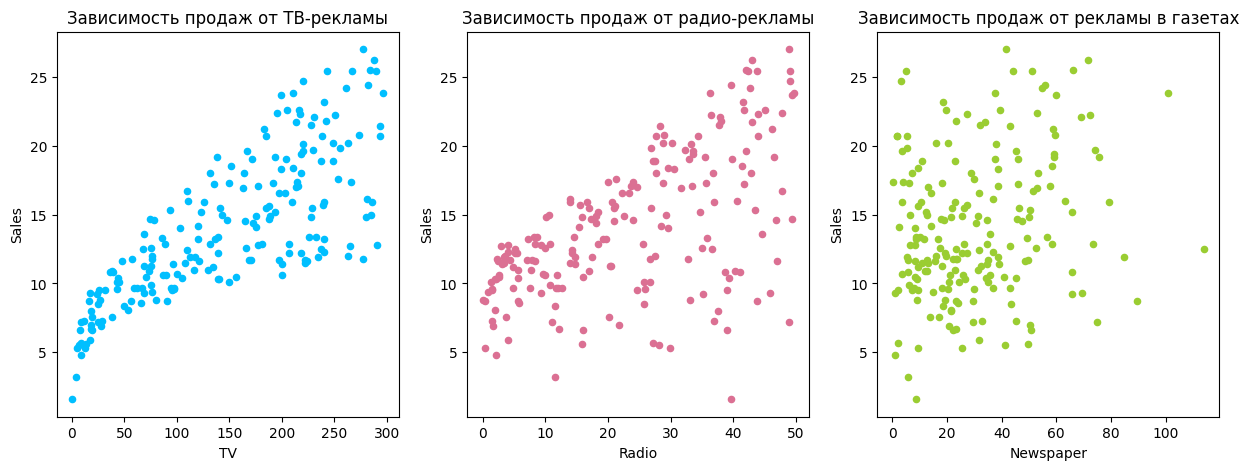

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax1 = data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], c='deepskyblue')
ax2 = data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], c='palevioletred')
ax3 = data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], c='yellowgreen')
ax1.title.set_text('Зависимость продаж от ТВ-рекламы')
ax2.title.set_text('Зависимость продаж от радио-рекламы')
ax3.title.set_text('Зависимость продаж от рекламы в газетах')
plt.show()

А теперь давайте представим, что вы работаете на компанию, которая производит и продает этот товар. Компания может задать вам следующий вопрос: на основании этих данных, как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:
1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке, можем ли мы предсказать продажи?


Попробуем разобраться, как на эти вопросы ответить

## Одномерная линейная регрессия

Простая линейная регрессия - это подход к прогнозированию **количественной переменной** с использованием **одного признака**:

$y = \beta_0 + \beta_1x$

- $y$ это таргет
- $x$ это признак
- $\beta_0$ это свободный член
- $\beta_1$ это коэффициент при признаке x

То есть по сути если представить наши данные на диаграмме рассеяния, мы хотим провести через них прямую, наиболее хорошо отображающую данные.

Вместе $\beta_0$ и $\beta_1$ называются **коэффициентами модели**. Чтобы создать свою модель, вы должны "выучить" значения этих коэффициентов. И как только мы "выучим" эти коэффициенты, мы сможем использовать модель для прогнозирования продаж!

## Оценка ("обучение") коэффициентов модели
 

В статистической модели машинного обучения коэффициенты оцениваются с использованием **метода наименьших квадратов**, что означает, что мы находим линию (математически), которая минимизирует **сумму квадратов остатков** (или «сумму квадратов ошибок»)




<img src="https://github.com/hse-python-mirec/dap_mirec_2022/blob/main/seminar9/images/08_estimating_coefficients.png?raw=true">

Что изображено на схеме?
- Черные точки - это **наблюдаемые значения** x и y.
- Синяя линия - это наша **линия полученная при минимизации квадратов ошибок**.
- Красные линии - это **остатки**, которые представляют собой расстояния между наблюдаемыми значениями и линией наименьших квадратов.

Как коэффициенты модели соотносятся с линией наименьших квадратов?
- $ \beta_0 $ - это **точка пересечения** (значение $ y $, когда $ x $ = 0)
- $ \beta_1 $ - это **наклон** (изменение $ y $, деленное на изменение $ x $)

Вот графическое изображение этих вычислений:

<img src="https://github.com/hse-python-mirec/dap_mirec_2022/blob/main/seminar9/images/08_slope_intercept.png?raw=true">

Давайте попробуем использовать библиотеку **Statsmodels** для оценки коэффициентов модели на наших данных

In [ ]:
import statsmodels.formula.api as smf

# создаём модель по заданной формуле и обучаем ее на data при помощи метода .fit()
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# выведем полученные коэффициенты модели
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

В аргументе *formula* прописывается непосредственно формула по которой мы хотим разложить ннаши данные. В нашем случае мы хотим составить следующую формулу: $Sales = \beta_0 + \beta_1 TV$, поэтому наша формула в statsmodels будет выглядеть как: $Sales \sim TV$. 

Подробнее про составленее формул можно почитать [тут](https://patsy.readthedocs.io/en/latest/formulas.html).

Отлично, числа мы какие-то получили, но что с ними дальше делать? Давайте подумаем, как мы их можем проинтерпретировать.

## Интерпретация коэффициентов модели

Как мы интерпретируем TV коэффициент ($\beta_1$)?
- Дополнительные 1000 долларов, потраченные на телевизионную рекламу, увеличивают продажы на 47.537 товаров.

Обратите внимание, что если бы увеличение расходов на телевизионную рекламу было связано с **снижением** продаж, $\beta_1$ был бы **отрицательным**.

## Использование модели для прогнозирования

Как уже упоминалось выше, оценка влияния признаков на целевую переменную - это не единственное, что мы хотим делать. 

Допустим, появился новый рынок, на котором расходы на телевизионную рекламу составили **$50.000**. Что бы мы спрогнозировали для продаж на этом рынке?

Так как мы уже знаем коэффициенты $\beta_0$ и $\beta_1$ остается только подставить все числа в формулу. 

$$y = \beta_0 + \beta_1 TV$$
$$y = 7.032594 + 0.047537 \times 50$$

In [ ]:
y = 7.032594 + 0.047537 * 50
y

9.409444

Таким образом, мы могли бы предсказать продажи **9409 товаров** на этом рынке.

Конечно, мы также можем использовать Statsmodels  для прогнозирования:

In [ ]:
# нам придется созать DataFrame, так как statsmodels работет с ними

X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [ ]:
# use the model to make predictions on a new value

lm.predict(X_new)

0    9.409426
dtype: float64

## Построение линии наименьших квадратов
Как упоминалось выше при построении линейной модели мы по сути ищем прямую, которая будет наиболее хорошо отображать наши данные.

Давайте сделаем прогнозы для **наименьших и наибольших наблюдаемых значений x**, а затем используем предсказанные значения для построения линии наименьших квадратов:

In [ ]:
# создадим DataFrame с минимальным и максимальным значением 

X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [ ]:
# и сделаем прогнозы для этих значений

preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

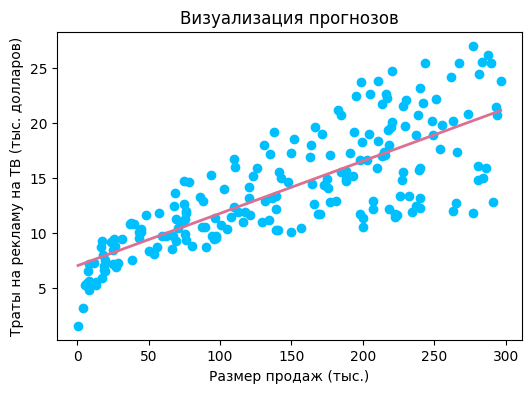

In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Визуализация прогнозов')

plt.scatter(data.TV, data.Sales, c='deepskyblue')
plt.plot(X_new, preds, c='palevioletred', linewidth=2)
plt.xlabel('Размер продаж (тыс.)')
plt.ylabel('Траты на рекламу на ТВ (тыс. долларов)')
plt.show()

## Насколько хорошо модель соответствует данным?

После того, как мы построили модель логично задаться вопросом: а насколько хорошей она вышла?

Одним из способом оценки качества линейной модели является значение **R-квадрат**. R-квадрат-это **это доля объяснённой суммы квадратов в общей**:

$$R^2 = 1 - \frac{\sum_i(y_i - \hat{y}_i)^2}{\sum_i(y_i - \overline{y})^2}$$

Чем выше R-квадрат, тем лучше, потому что это означает, что большая дисперсия объясняется моделью. Вот пример того, как выглядит R-квадрат":

<img src="https://github.com/hse-python-mirec/dap_mirec_2022/blob/main/seminar9/images/08_r_squared.png?raw=true">

Вы можете видеть, что **синяя линия** объясняет некоторую дисперсию в данных (R-квадрат=0,54), **зеленая линия** объясняет большую часть дисперсии (R-квадрат=0,64), а **красная линия** еще больше подходит к данным обучения (R-квадрат=0,66). (Красная линия выглядит так, как будто она **слишком сильно подстраивается**?)

Давайте вычислим значение R-квадрата для нашей простой линейной модели:

In [ ]:
r_2 = lm.rsquared
r_2

0.611875050850071

Является ли это "хорошим" значением R-квадрата? Трудно сказать. Порог для хорошего значения R-квадрата широко зависит от области, от набора данных, который мы рассматриваем и еще много чего. Поэтому он наиболее полезен в качестве инструмента для **сравнения различных моделей**.

## Множественная линейная регрессия

Простая линейная регрессия может быть легко расширена для включения нескольких объектов. Это называется **множественной линейной регрессией** (вообще, когда говорят о линейной регрессии подразумевают именно ее):

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Каждый $x$ представляет собой отдельный признак и имеет свой собственный коэффициент. 

Если вернуться к нашему набору данных, то формула будет выглядеть как-то так:

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Давайте воспользуемся Statsmodels для оценки этих коэффициентов:

In [ ]:
# как и раньше создаём модель по формуле
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# и выводим коэффициенты
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Теперь наша формула для представления данных изменилась, поэому формула в smf.ols() тоже изменилась на $Sales \sim TV + Radio + Newspaper$, что значит, что мы хотим представить *Sales* в виде суммы (взвешенной) признаков.

Как мы интерпретируем эти коэффициенты? Для данной суммы расходов на рекламу на радио и в газетах **увеличение расходов на рекламу на телевидении на 1000 долларов увеличивает продажы на 45.765**.


## Несколько слов про значимость полученных результатов

Вы должны понимать, что **коэффициенты полученные вами это случайные величины**. В примере выше, например, можно сказать, что **реклама в газетах уменьшает количество проданного товара**, тк коэффициент перед сооствествующим коэффициентом отрицательный. Однако, из-за того, что коэффициент маленький **так могло произойти случайно**. Чтобы оценить это вам понадобяться знания, которые вы получите позже :) Однако, даже сейчас вы можете посмотреть отчет, который предлагает Statsmodels и сделать "примерные" выводы о значимости каждого коэффициента 

In [ ]:
# выведем саммари по полученной модели

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.58e-96
Time:                        22:56:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Что можно увидеть по результатам выше?

- Расходы на рекламу на телевидении и радио **положительно связаны** с продажами, в то время как расходы на рекламу в газетах **незначимо отрицательно связаны** с продажами.
- Эта модель имеет более высокий **R-квадрат** (0.897), чем предыдущая модель, что означает, что эта модель обеспечивает лучшее соответствие данным, чем модель, включающая только TV (что ожидаемо).

# **Опциональная часть**
## Обработка категориальных признаков с двумя категориями

До сих пор все наши признаки были числовыми. Что, если один из наших признаков был категориальным?

Давайте создадим новый бинарный признак под названием **Size** с двумя возможными значениями: **маленький или большой**:

In [ ]:
import numpy as np

# зафиксируем случайность
np.random.seed(12345)

# создадим массив из случайных чисел от 0 до 1
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Random,Size
1,230.1,37.8,69.2,22.1,-0.367488,large
2,44.5,39.3,45.1,10.4,1.045913,small
3,17.2,45.9,69.3,9.3,1.219954,small
4,151.5,41.3,58.5,18.5,-0.247699,small
5,180.8,10.8,58.4,12.9,-0.416232,large


Нам нужно представить все данные **в числовом формате**. Если функция имеет только две категории, мы можем просто создать **фиктивную переменную**, которая представляет категории как бинарное значение:

In [ ]:
# закодируем наш катигориальный признак 0 и 1

data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,-0.367488,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,1.045913,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,1.219954,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,-0.247699,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,-0.416232,large,1,suburban,1,0


И теперь мы можем обучить модель также как и раньше!

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + IsLarge', data=data).fit()
lm.rsquared

0.8972400790092474

## Обработка категориальных предикторов с более чем двумя категориями

Давайте создадим новый признак под названием **Area** и случайным образом назначим наблюдения **rural, suburban, или urban**:

In [ ]:
# снова заполним признак случайными значениями, но на этот раз разделим его на 3 части

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,-0.367488,large,1,rural
2,44.5,39.3,45.1,10.4,1.045913,small,0,urban
3,17.2,45.9,69.3,9.3,1.219954,small,0,rural
4,151.5,41.3,58.5,18.5,-0.247699,small,0,urban
5,180.8,10.8,58.4,12.9,-0.416232,large,1,suburban


Мы должны представлять область численно, но мы не можем просто кодировать ее как 0=Сельская, 1=Пригородная, 2=городская, потому что это означало бы упорядоченное отношение между пригородом и городом (и, таким образом, город каким-то образом "дважды" является пригородной категорией). Обычно у нас нет порядка на категориальных признаках (хотя может и быть, **придумайте пример**), поэтому кодировать их так - плохая идея.

Вместо этого мы создаем **еще одну фиктивную переменную**. Итого у нас получится два новых признака, каждый из которых будет отвечать за свою категорию и принимать значение 1, если объект относится к этой категории и 0 иначе.

Например пускай у нас был набор данных с животными и было всего 3 вида: кошки, собаки, панды. Тогда стоит создать 2 новых признака. Первый будет содержать информацию о том, является ли животное кошкой, второй - является ли животное собакой (для панды такой не нужен, потому что если животное не кошка или собака, то это панда).

In [ ]:
# кодирем указанным выше способом признак Area
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# присоединяем этот признак к нашему датафрейму
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,-0.367488,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,1.045913,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,1.219954,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,-0.247699,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,-0.416232,large,1,suburban,1,0


Вот как мы интерпретируем кодировку:
- **сельский** кодируется как Area_suburban=0 и Area_urban=0
- **suburban** кодируется как Area_suburban=1 и Area_urban=0
- **urban** кодируется как Area_suburban=0 и Area_urban=1

В нашем случае мы создали только **две фиктивные переменные, а не три?** потому что две переменные захватывают всю информацию об признаке *Area* и неявно определяют сельскую местность как базовое значение. В общем случае, если у вас есть категориальный признак с $k$ значениями, вы создаете $k-1$ фиктивные переменные.

Если это сбивает с толку, подумайте о том, почему нам нужна только одна переменная для размера (IsLarge), а не две фиктивные переменные (IsSmall и IsLarge).

Давайте включим в модель две новые фиктивные переменные:

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + IsLarge + Area_suburban + Area_urban', data=data).fit()
lm.rsquared

0.8981611875394304

Как мы интерпретируем коэффициенты?
- Если все остальные переменные фиксированны, то быть **пригородным** районом, влечет **снижение** продаж на 106,56  (по сравнению с базовым уровнем, который является сельским).
- Быть **городским** районом связано со средним **увеличением** продаж на 268,13 (по сравнению с сельским районом).

**Заключительное замечание о фиктивном кодировании:** если у вас есть категории, которые можно ранжировать (например, полностью не согласен, не согласен, нейтрален, согласен, полностью согласен), вы можете использовать одну фиктивную переменную и представлять категории численно (например, 1, 2, 3, 4, 5).

## И на последок немножко scikit-learn 

Scikit-learn - это библиотека для работы с моделями машинного обучения, именно она чаще всего используется для построения предиктивных (не статистических моделей). Давайте попробуем с её помощью обучить простую модель линейной регрессии.


In [ ]:
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,-0.367488,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,1.045913,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,1.219954,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,-0.247699,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,-0.416232,large,1,suburban,1,0


Подготовим данные - разделим датасет на признаки и таргет

In [ ]:
X = data.drop(columns=['Size', 'Sales', 'Area'])
Y = data['Sales']

Разделим данные на наборы для обучения и тестирования модели

In [ ]:
from sklearn.model_selection import train_test_split

# разбиваем набор обучающих и тестовых данных 80% на 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 7)
(40, 7)
(160,)
(40,)


Обучим модель с помощью sklearn LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# оценка модели для тренировочного набора
y_train_predict = lin_model.predict(X_train)
# оценка модели для тестового набора
y_test_predict = lin_model.predict(X_test)
# R-квадрат модели
r2_train = r2_score(Y_train, y_train_predict)
r2_test = r2_score(Y_test, y_test_predict)

print('R2 на обучающей выборке = {}'.format(r2_train))
print('R2 на тестовой выборке = {}'.format(r2_test))

R2 на обучающей выборке = 0.8977612804542946
R2 на тестовой выборке = 0.8953754052833038


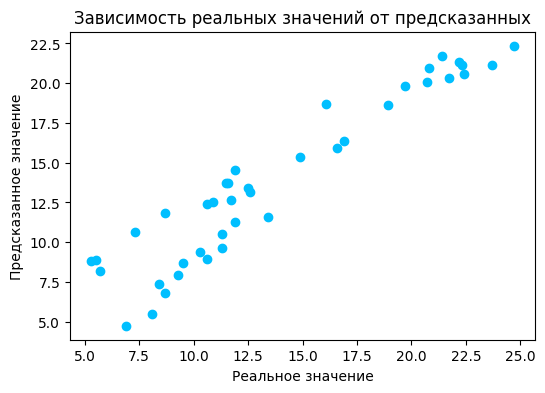

In [ ]:
# посмотрим на график зависимости y_test от y_pred
# в идеале должна быть прямая линия

plt.figure(figsize=(6, 4))
plt.title('Зависимость реальных значений от предсказанных')
plt.scatter(Y_test, y_test_predict, color='deepskyblue')
plt.xlabel('Реальное значение')
plt.ylabel('Предсказанное значение')
plt.show()

## И на самый последок... Машинное обучение - это классно!! 

Искусственный интеллект, который сейчас очень быстро развивается и очень популярен, это тоже часть машинного обучения. Так что если вы вдруг еще не видели разные классные нейронные сетки (кроме ChatGPT, её то я думаю видели все...), то вот вам сайты, где можно самому попробовать использовать нейронки:

- [Балабола от Яндекса](https://yandex.ru/lab/yalm). Она умеет генерировать разные тексты на русском и вполне может помочь вам добавить чего-то (воды) в курсовую работу...
- [QQ World](https://h5.tu.qq.com/web/ai-2d/cartoon/index). Нейронка, которая превратит вас в аниме персонажа. 
- [DALL-E 2](https://openai.com/product/dall-e-2). Она просто очень хорошо рисует и нарисует всё, что вы попросите.
- [SAM](https://segment-anything.com/demo).  Может сегментировать любое фото, причём довольно хорошо! 
- [ControlNet](https://huggingface.co/spaces/hysts/ControlNet-v1-1). Нейронка, которая умеет генерировать изображения под вашим пристальным контролем.